In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

# GETTING THE DATA


In [3]:
df = pd.read_csv('ml-100k/ratings.csv')

In [4]:
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
movies_title = pd.read_csv('ml-100k/movies.csv')

In [6]:
movies_title.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
df = pd.merge(df,movies_title,on='movieId')

# EXPLORATORY DATA ANALYSIS


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('white')

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

### CREATING A DATAFRAME 

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [13]:
ratings.head()

,rating,no of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


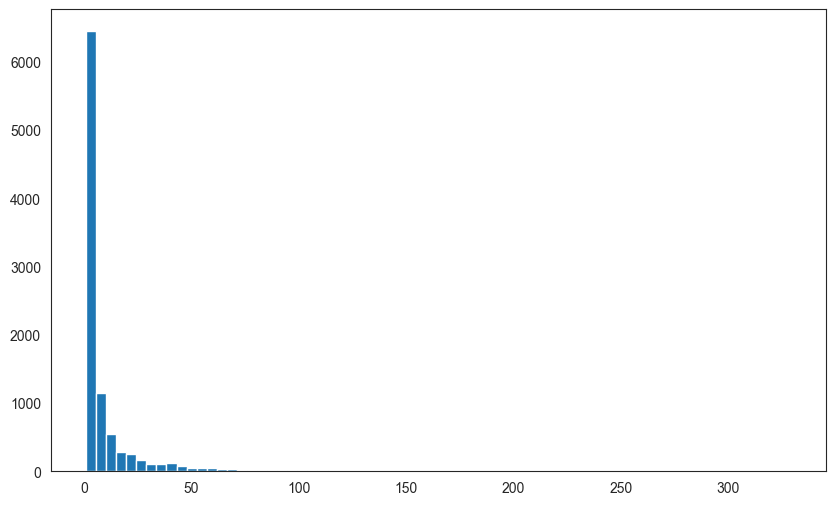

In [14]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'], bins=70)
plt.show()

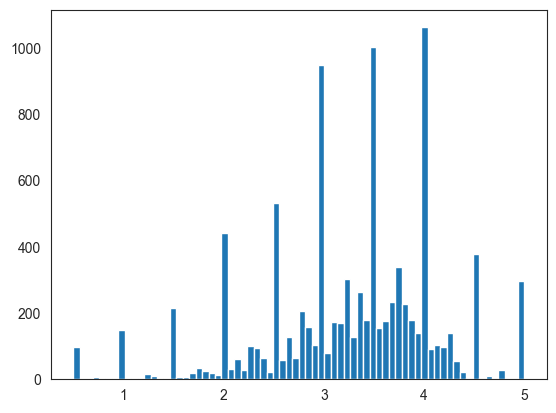

In [15]:
plt.hist(ratings['rating'], bins=70)
plt.show()

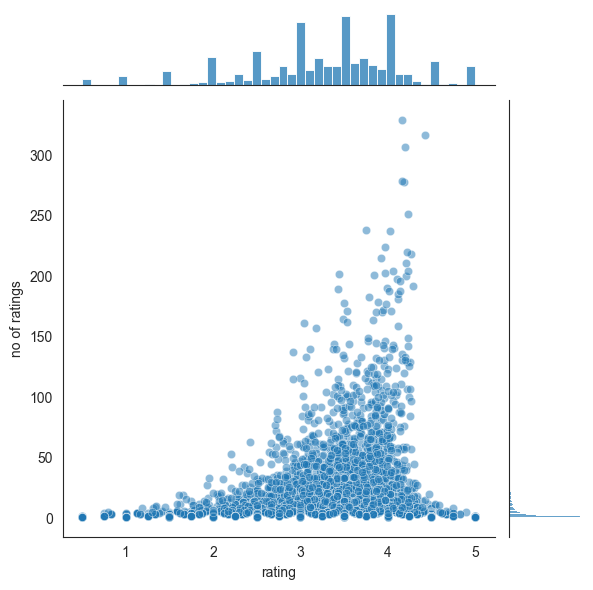

In [16]:
sns.jointplot(x='rating' , y='no of ratings' , data=ratings , alpha=0.5)

## CREATING MOVIE RECOMMENDATION

In [17]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [18]:
moviemat = df.pivot_table(index="userId", columns="title",values="rating")

In [19]:
toystory_user_ratings = moviemat['Toy Story (1995)']

In [20]:
similar_to_toystory = moviemat.corrwith(toystory_user_ratings)

In [21]:
corr_toystory = pd.DataFrame(similar_to_toystory , columns=['Correlation'])

In [22]:
corr_toystory.dropna(inplace=True)

In [23]:
corr_toystory.sort_values('Correlation' , ascending = False)

,Correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
...,...
In a World... (2013),-1.0
The Drop (2014),-1.0
Mo' Money (1992),-1.0


In [24]:
corr_toystory = corr_toystory.join(ratings['no of ratings'])  

In [25]:
corr_toystory[corr_toystory['no of ratings']>100].sort_values('Correlation' , ascending = False)

,Correlation,no of ratings
title,,
Toy Story (1995),1.000000,215
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
"Monsters, Inc. (2001)",0.490231,132
...,...,...
"Rock, The (1996)",-0.038208,121
Good Will Hunting (1997),-0.044629,141
Interview with the Vampire: The Vampire Chronicles (1994),-0.061637,109


## MAKING A PREDICT FUNCTION 

In [26]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie , columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['no of ratings'])  
    predictions = corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation' , ascending = False)
    
    return predictions